<a href="https://colab.research.google.com/github/ArseniyZu/AlgoTrading/blob/main/main1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ArseniyZu/AlgoTrading.git
%cd AlgoTrading/

Cloning into 'AlgoTrading'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (146/146), done.
remote: Compressing objects: 100% (142/142), done.
remote: Total 146 (delta 78), reused 10 (delta 0), pack-reused 0
Receiving objects: 100% (146/146), 77.17 KiB | 1.79 MiB/s, done.
Resolving deltas: 100% (78/78), done.
/content/AlgoTrading


In [6]:
!git pull

remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/ArseniyZu/AlgoTrading
   2dd8f64..6fe119e  main       -> origin/main
Updating 2dd8f64..6fe119e
Fast-forward
 MACD.py | 2 +-
 1 file changed, 1 insertion(+), 1 deletion(-)


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from draw import drawCandle, drawTrend
from trend import trend
from BollingerBands import punch_bolBands, walking_bolBands
from figuresBolBands import find_W_figure
from MACD import MACD, find_cross

In [3]:
df = pd.read_csv('МТС.txt', sep=";", usecols=["<OPEN>", "<DATE>", "<CLOSE>", "<LOW>", "<HIGH>"], decimal=",")
df.columns = ["Date", "Open", "High", "Low", "Close"]
df.head()

,Date,Open,High,Low,Close
0,20170103,259.95,268.40,259.00,262.65
1,20170104,262.85,263.10,257.05,259.30
2,20170105,260.80,264.75,258.00,260.50
3,20170106,259.45,262.70,254.00,257.00
4,20170109,257.00,259.55,255.45,258.40


In [ ]:
df.shape

(1008, 5)

In [4]:
drawCandle(df, 0, len(df))

In [4]:
df = MACD(df, 200, 12, 26, 9)

/content/AlgoTrading/MACD.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/content/AlgoTrading/MACD.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



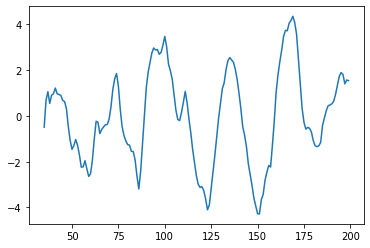

In [5]:
plt.plot(df.index, df["HIST_MACD"])

,Date,Open,High,Low,Close,MACD,Signal,HIST_MACD


In [11]:
for i in range(5, len(df)):
  check = find_cross(df[:i])
  if check != 0:
    print(i, check)

14 Down
37 Up
43 Down
55 Up
73 Down
75 Up
79 Down
96 Up
108 Down
126 Up
141 Down
153 Up


In [12]:
drawCandle(df, 0, len(df))

In [ ]:
drawTrend(df, trend(df, 100)[1], trend(df, 100)[2])

In [ ]:
walking_bolBands(df, 20, 200, 3)

('non', 3, 2)

In [ ]:
df.High[100:200].idxmin()

128

In [ ]:
find_W_figure(df, 200)

'non'